In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LDA:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        mean_vectors = []
        for cls in np.unique(y):
            mean_vectors.append(np.mean(X[y==cls], axis=0))
        S_W = np.zeros((X.shape[1], X.shape[1]))
        for cls, mv in zip(np.unique(y), mean_vectors):
            class_sc_mat = np.zeros((X.shape[1], X.shape[1]))
            for row in X[y == cls]:
                row, mv = row.reshape(X.shape[1], 1), mv.reshape(X.shape[1], 1)
                class_sc_mat += (row-mv).dot((row-mv).T)
            S_W += class_sc_mat
        overall_mean = np.mean(X, axis=0)
        S_B = np.zeros((X.shape[1], X.shape[1]))
        for i, mean_vec in enumerate(mean_vectors):  
            n = X[y==i+1,:].shape[0]
            mean_vec = mean_vec.reshape(X.shape[1], 1)
            overall_mean = overall_mean.reshape(X.shape[1], 1)
            S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
        eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
        self.w = np.hstack((eig_pairs[0][1].reshape(X.shape[1],1), eig_pairs[1][1].reshape(X.shape[1],1)))

    def transform(self, X):
        return X.dot(self.w)

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)

In [4]:
lda = LDA()
X = df.iloc[:, 0:4].values
y = df['class'].values
lda.fit(X, y)
X_lda = lda.transform(X)

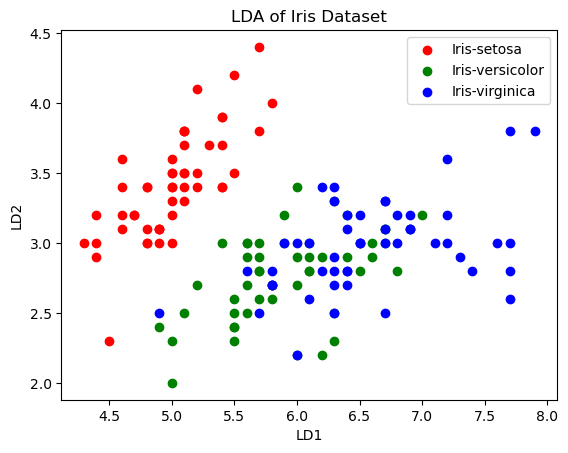

In [10]:
class_map = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}

for class_name, color in class_map.items():
    plt.scatter(X_lda[df['class'] == class_name, 0], X_lda[df['class'] == class_name, 1], c=color, label=class_name)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of Iris Dataset')
plt.legend()
plt.show()